<img src="https://i.imgur.com/lxGDc73.gif">

# Gaming companies

As a data engineer I have asked all the employees to show their preferences on where to place the new office. The goal is to place the new company offices in the best place for the company to grow. I have to find a place that more or less covers all the requirements.



## Import the necessary libraries

In [4]:
from pymongo import MongoClient
import pandas as pd

<img width=400 src="https://cdn.dribbble.com/users/776867/screenshots/6179644/mongogooo.gif">

## Conect with `MongoDb`

In [5]:
client = MongoClient("localhost:27017")

We need to check which are the different collections:

In [6]:
client.list_database_names()

['Proyecto',
 'Quotes',
 'Species',
 'admin',
 'companies',
 'config',
 'final',
 'geo',
 'labflask',
 'local']

We choose the database called `Companies`.

In [7]:
companies = client.get_database("companies")

Inside the database Companies, we choose the collection called `Companies`.

In [8]:
companies.list_collection_names()

['companies', 'offices']

In [9]:
comp = companies.get_collection("companies")

<img width=300 src="https://i.gifer.com/76aE.gif">

### We need companies active in the `gaming industry`.

Therefore we use the function `.distinct()` to see the different types of company using the `catergory_code` parameter.

In [10]:
comp.distinct("category_code")

[None,
 'advertising',
 'analytics',
 'automotive',
 'biotech',
 'cleantech',
 'consulting',
 'design',
 'ecommerce',
 'education',
 'enterprise',
 'fashion',
 'finance',
 'games_video',
 'government',
 'hardware',
 'health',
 'hospitality',
 'legal',
 'local',
 'manufacturing',
 'medical',
 'messaging',
 'mobile',
 'music',
 'nanotech',
 'network_hosting',
 'news',
 'nonprofit',
 'other',
 'photo_video',
 'public_relations',
 'real_estate',
 'search',
 'security',
 'semiconductor',
 'social',
 'software',
 'sports',
 'transportation',
 'travel',
 'web']

In [11]:
cond1 = {"category_code":"games_video"}

In [12]:
cond2 = {"tag_list":{"$regex":"/*gaming*"}}

<img width=300 src="https://tufuturo.cl/wp-content/uploads/2020/01/d370e515ecba80b8cc994e849fd0c44d.gif">

### We also need companies with more than 87 employees.
* 20 Designers
* 5 UI/UX Engineers
* 10 Frontend Developers
* 15 Data Engineers
* 5 Backend Developers
* 20 Account Managers
* 1 Maintenance guy that loves basketball
* 10 Executives
* 1 CEO/President

In [13]:
cond3 = {"number_of_employees": {"$gt":87}}

In order to have a better visualization of the data we only select the `name`, `where` the company is and the `number of employees`.

In [14]:
proj = {"name":1,"offices.city":1, "number_of_employees":1, "offices.latitude":1, "office.longitude":1}

In [16]:
gaming = list(comp.find({"$and":[{"$or": [cond1,cond2]},cond3]}, proj))
gaming

[{'_id': ObjectId('52cdef7c4bab8bd675297dc0'),
  'name': 'Livestream',
  'number_of_employees': 120,
  'offices': [{'city': 'New York', 'latitude': 40.726155}]},
 {'_id': ObjectId('52cdef7c4bab8bd675297dc1'),
  'name': 'Ustream',
  'number_of_employees': 250,
  'offices': [{'city': 'San Francisco', 'latitude': 37.392936},
   {'city': 'Los Angeles', 'latitude': None},
   {'city': 'Budapest', 'latitude': None}]},
 {'_id': ObjectId('52cdef7c4bab8bd675297df0'),
  'name': 'RockYou',
  'number_of_employees': 106,
  'offices': [{'city': 'Redwood City', 'latitude': 37.484619}]},
 {'_id': ObjectId('52cdef7c4bab8bd675297e44'),
  'name': 'hi5',
  'number_of_employees': 100,
  'offices': [{'city': 'San Francisco', 'latitude': 37.788668}]},
 {'_id': ObjectId('52cdef7c4bab8bd675297e49'),
  'name': 'Nintendo',
  'number_of_employees': 5080,
  'offices': [{'city': None, 'latitude': 36.204824}]},
 {'_id': ObjectId('52cdef7c4bab8bd675297e8e'),
  'name': 'The Walt Disney Company',
  'number_of_employees'

In [97]:
gaming[0].get("offices")[0].get("city")

'New York'

In [21]:
empresas = []

try:
    
    for emp in gaming:

        if len(emp.get("offices")) > 1:

            for i in range(len(emp.get("offices"))):

                dicc = {
                    "Name" : emp.get("name"),
                    "City" : emp.get("offices")[i].get("city"),
                    "Number of employees" : emp.get("number_of_employees")
                }

                empresas.append(dicc)

        else:

            dicc = {
                "Name" : emp.get("name"),
                "City" : emp.get("offices")[0].get("city"),
                "Number of employees" : emp.get("number_of_employees")
            }

            empresas.append(dicc)
            
except:
    
    None

df_gaming = pd.DataFrame(empresas)

Theese are the `Gaming` companies with more than 87 employees.

In [22]:
df_gaming

,Name,City,Number of employees
0,Livestream,New York,120
1,Ustream,San Francisco,250
2,Ustream,Los Angeles,250
3,Ustream,Budapest,250
4,RockYou,Redwood City,106
5,hi5,San Francisco,100
6,Nintendo,None,5080
7,The Walt Disney Company,Burbank,25000
8,Zango,Bellevue,225
9,hulu,Los Angeles,153


In [146]:
df_gaming["City"].value_counts()

San Francisco            7
Los Angeles              5
New York                 3
Redwood City             2
Shanghai                 2
Boulder                  1
Philadelphia             1
Baltimore                1
Beverly Hills            1
Paris                    1
Westwood                 1
Berlin                   1
Singapore                1
Boca Raton               1
Buenos Aires             1
                         1
Covent Garden, London    1
Los Gatos                1
Burbank                  1
Dundee                   1
Stone Mountain           1
Toronto, Ontario         1
Beijing                  1
Budapest                 1
Bellevue                 1
Reykjavik                1
Brooklyn                 1
Name: City, dtype: int64

<img width=400 src="https://i.pinimg.com/originals/45/b4/dc/45b4dc1493c95ba63285a2db21d6662f.gif">

### Developers like to be near successful tech `startups` that have raised at least `1 Million dollars`, so we need to find those companies and where are they located.

In [48]:
cond3 = {"tag_list":{"$regex":"/*start-up*"}}

In [52]:
cond4 = {"total_money_raised":{"$gt":"$1M"}}

In [53]:
proj = {"name":1,"offices.city":1}

In [57]:
start_up = list(comp.find({"$and": [cond3,cond4]}, proj))

In [130]:
s_up=[]

for emp in start_up:
    
    if len(emp.get("offices")) > 1:
        
        for i in range(len(emp.get("offices"))):
            
            dicc = {
                "Name" : emp.get("name"),
                "City" : emp.get("offices")[i].get("city")
            }
            
            s_up.append(dicc)
        
    else:
        
        dicc = {
            "Name" : emp.get("name"),
            "City" : emp.get("offices")[0].get("city")
        }
        
        s_up.append(dicc)

df_sup = pd.DataFrame(s_up)

This are the `Start-Up` companies that have raise more than `1 Million`.

In [131]:
df_sup

,Name,City
0,Moviestorm,Cambridge
1,MojoPages,San Diego
2,MojoPages,Calabassas
3,Getyoo,Brussels


In [132]:
df_sup["City"].value_counts()

Cambridge     1
Brussels      1
San Diego     1
Calabassas    1
Name: City, dtype: int64

<img width=300 src="https://i.pinimg.com/originals/29/df/4e/29df4ede8b954bc0fe4677159c75c7a6.gif">

### Designers like to go to design talks and share knowledge. There must be some `nearby companies that also do design`.

In [114]:
cond5 = {"tag_list":{"$regex":"/*design*"}}

In [115]:
proj = {"name":1,"offices.city":1}

In [116]:
design = list(comp.find(cond5, proj))

In [123]:
dsgn = []

try:
    
    for emp in design:

        if len(emp.get("offices")) > 1:

            for i in range(len(emp.get("offices"))):

                dicc = {
                    "Name" : emp.get("name"),
                    "City" : emp.get("offices")[i].get("city"),
                    #"Number of employees" : emp.get("number_of_employees")
                }

                dsgn.append(dicc)

        else:

            dicc = {
                "Name" : emp.get("name"),
                "City" : emp.get("offices")[0].get("city"),
                #"Number of employees" : emp.get("number_of_employees")
            }

            dsgn.append(dicc)
            
except:
    
    None

df_design = pd.DataFrame(dsgn)

These are the `design companies` and where are they located

In [1]:
df_design.head()

NameError: name 'df_design' is not defined

In [142]:
df_design["City"].value_counts(1)

San Francisco    0.108108
London           0.081081
                 0.054054
Tel Aviv         0.054054
Los Angeles      0.054054
New York         0.054054
Allentown        0.054054
Wellington       0.027027
San Jose         0.027027
Vancouver        0.027027
Hyderabad        0.027027
Collingwood      0.027027
Coral Gables     0.027027
Rocky River      0.027027
Newark           0.027027
Carlsbad         0.027027
PARIS            0.027027
Berlin           0.027027
Bath             0.027027
Palo Alto        0.027027
Jacksonville     0.027027
Oakland          0.027027
Irvine           0.027027
Los Altos        0.027027
Chennai          0.027027
San Diego        0.027027
NY               0.027027
Name: City, dtype: float64

## Conclusions

As we can see the main cities for `Gaming companies` are:
* San Francisco (17.1 %)
* Los Angeles (12.22 %)
* New York ( 7.35 %)

The `Start-up´s` that have raised mor than `1 Million` are located in:

* Cambridge     
* Brussels      
* San Diego     
* Calabassas

The 3 main cities for `design companies` where our designers could go to `talks and share knowledge`are:

* San Francisco (10.81 %)
* London (8.1 %)
* Tel Aviv (5.4 %)

#### As we have seen, the region that meets all three requirements is `California` becouse:
* There are about `30%` of the `Gaming Companies`
* Almost `11%` of the `Design Companies` are located in San Francisco.
* There is a `Start-Up` in San Diego that has grown more than `1 Million`.

## and the city chosen within california is:

<img src="https://4.bp.blogspot.com/-t-y_DP6fs84/WvBgeXBIpxI/AAAAAAAB3jE/ESH3I48k8C0GSJCO0XHW9E7EvDEMjYlwQCLcBGAs/s1600/DrumrollPlease.gif">











.

.







# San Francisco!! 

<img src="https://media3.giphy.com/media/1gSpPNH54G222oMtgR/source.gif">

## And the company to select the location is `Zynga`. [37.7709, -122.4058]

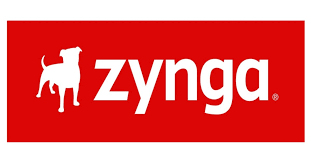

In [25]:
cond = {"name":"zynga", "offices.city":"San Francisco"}
proj = {"name":1, "number_of_employees":1, "offices.city":1}
zynga = list(comp.find(cond,proj))
zynga


[]